In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Question 1 Blob Detection

Laplacian of Gaussian

$∇²_{norm}g = \sigma^2(\frac{∂²g}{∂x²} + \frac{∂²g}{∂y²})$



Current sigma value: 0.7072135785007072
Current sigma value: 1.0103051121438675
Current sigma value: 1.3133966457870279
Current sigma value: 1.616488179430188
Current sigma value: 1.9195797130733483
Current sigma value: 2.2226712467165086
Current sigma value: 2.5257627803596687
Current sigma value: 2.828854314002829
Parameters of the largest circle:
Center: (184, 253)
Radius: 25
Sigma value: 2.828854314002829


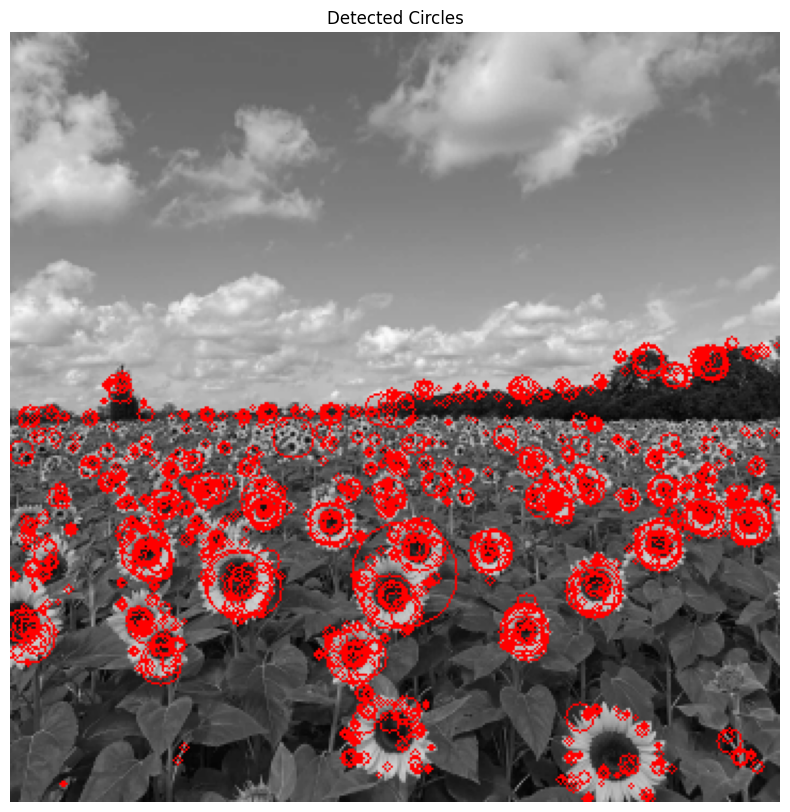

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
max_sigma = 4.0  # Maximum sigma value (larger values for larger blobs)
num_sigma = 8   # Number of sigma values to test
threshold = 0.375  # Threshold for blob detection

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.linspace(min_sigma, max_sigma, num_sigma):

    sigma = sigma/1.414

    # Print the current sigma value to the console
    print(f"Current sigma value: {sigma}")

    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
largest_circle = circles[0]
center, radius, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the grayscale image with detected circles using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()


## Question 2 

<Axes: title={'center': 'Generated Noisy Point Set'}, xlabel='X-axis', ylabel='Y-axis'>

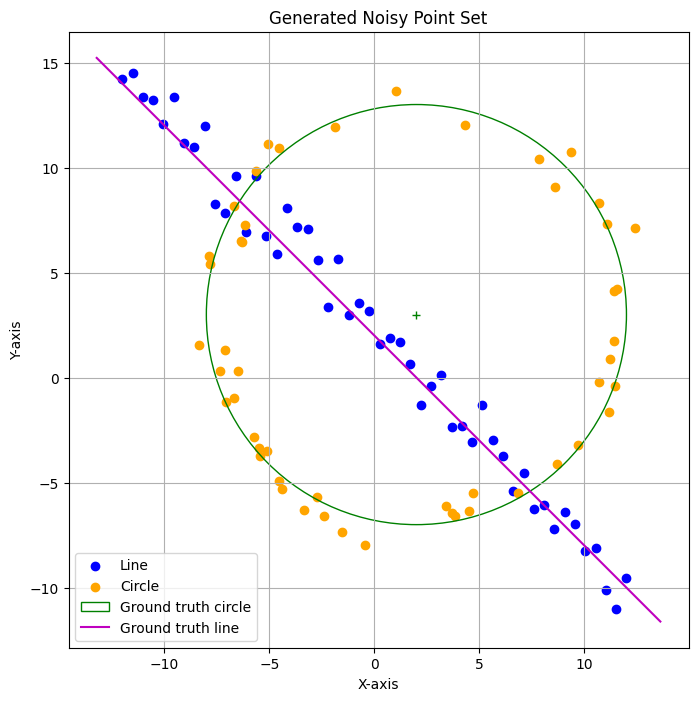

In [46]:
# Import necessary libraries
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib  # For exporting figures to LaTeX

# Set random seed for reproducibility
np.random.seed(0)

# Constants
N = 100  # Total number of points
half_n = N // 2  # Half of the points for circle and line

# Circle parameters
r = 10  # Radius of the circle
x0_gt, y0_gt = 2, 3  # Ground truth center of the circle
s = r / 16  # Standard deviation for noise

# Generate circular data points with noise
t = np.random.uniform(0, 2 * np.pi, half_n)  # Angles
n = s * np.random.randn(half_n)  # Noise
x_circ = x0_gt + (r + n) * np.cos(t)  # x-coordinates
y_circ = y0_gt + (r + n) * np.sin(t)  # y-coordinates
X_circ = np.hstack((x_circ.reshape(half_n, 1), y_circ.reshape(half_n, 1)))  # Circular points array

# Generate linear data points with noise
s_line, m_line, b_line = 1, -1, 2  # Noise std, slope, intercept
x_line = np.linspace(-12, 12, half_n)  # x-coordinates for the line
y_line = m_line * x_line + b_line + s_line * np.random.randn(half_n)  # y-coordinates with noise
X_line = np.hstack((x_line.reshape(half_n, 1), y_line.reshape(half_n, 1)))  # Linear points array

# Combine circular and linear point sets
X = np.vstack((X_circ, X_line))  # Combined points

# Function to plot the generated points
def plot_all(separate=True):
    fig, ax = plt.subplots(figsize=(8, 8))  # Create a new figure

    # Plot points
    if separate:
        ax.scatter(X_line[:, 0], X_line[:, 1], label='Line', color='blue')
        ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle', color='orange')
    else:
        ax.scatter(X[:, 0], X[:, 1], label='Point Set', color='purple')

    # Ground truth circle
    circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
    ax.add_patch(circle_gt)
    ax.plot(x0_gt, y0_gt, '+', color='g')  # Center of the circle

    # Ground truth line
    x_min, x_max = ax.get_xlim()  # Get x limits for the line
    x_ = np.array([x_min, x_max])
    y_ = m_line * x_ + b_line
    plt.plot(x_, y_, color='m', label='Ground truth line')

    plt.legend()  # Show legend
    plt.xlabel('X-axis')  # Label x-axis
    plt.ylabel('Y-axis')  # Label y-axis
    plt.title('Generated Noisy Point Set')  # Title of the plot
    plt.grid()  # Enable grid
    plt.axis('equal')  # Equal aspect ratio for circles
    return ax

# Plot the noisy point set
plot_all()


In [47]:
def dist(p1, p2):
    """
    Calculate the Euclidean distance between two points.
    
    Parameters:
    p1, p2 : tuple
        Tuples representing the coordinates of the two points (x, y).
    
    Returns:
    float
        The Euclidean distance between points p1 and p2.
    """
    (x1, y1), (x2, y2) = p1, p2
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

def line_eq(p1, p2):
    """
    Determine the normalized coefficients of the line equation from two points.
    
    Parameters:
    p1, p2 : tuple
        Tuples representing the coordinates of the two points (x, y).
    
    Returns:
    tuple
        Normalized coefficients (a, b, d) of the line equation.
    """
    (x1, y1), (x2, y2) = p1, p2
    a = (y2 - y1)  # Rise
    b = -(x2 - x1)  # Negated run
    d = a * x1 + b * y1  # Constant term
    
    # Assertion to verify that the second point lies on the line
    assert abs(a * x2 + b * y2 - d) < 1e-8

    # Normalize the coefficients
    norm = (a**2 + b**2)**0.5
    a, b, d = a/norm, b/norm, d/norm
    return a, b, d

def circle_eq(p1, p2, p3):
    """
    Compute the circumcenter and radius of the circle defined by three points.
    
    Parameters:
    p1, p2, p3 : tuple
        Tuples representing the coordinates of the three points (x, y).
    
    Returns:
    tuple
        Coordinates of the circumcenter (cx, cy) and radius r of the circle.
    """
    (x1, y1), (x2, y2), (x3, y3) = p1, p2, p3
    
    # Midpoints of segments
    mx1, my1 = (x1 + x2) / 2, (y1 + y2) / 2
    mx2, my2 = (x1 + x3) / 2, (y1 + y3) / 2

    # Slopes of the perpendicular bisectors
    s1 = -(x2 - x1) / (y2 - y1)
    s2 = -(x3 - x1) / (y3 - y1)

    # Intercepts of the perpendicular bisectors
    c1 = my1 - s1 * mx1
    c2 = my2 - s2 * mx2

    # Calculate the circumcenter coordinates
    cx = (c2 - c1) / (s1 - s2)
    cy = s1 * cx + c1
    
    # Assertion to ensure circumcenter is consistent with the points
    assert abs(s2 * cx + c2 - cy) < 1e-8

    # Calculate radius and validate distances
    r = dist((cx, cy), p1)
    assert abs(dist((cx, cy), p2) - dist((cx, cy), p1)) < 1e-8
    return cx, cy, r


In [48]:
# Squared error calculation for line and circle

def tls_error_line(params, *args):
    """
    Calculate the total least squares error for a line defined by parameters.

    Parameters:
    params : tuple
        A tuple containing the coefficients (a, b, d) of the line equation.
    args : tuple
        A tuple containing indices of points to consider and the point set X.

    Returns:
    float
        The total least squares error for the given line parameters.
    """
    a, b, d = params
    indices, X = args
    error = np.sum((a * X[indices, 0] + b * X[indices, 1] - d)**2)
    return error

def tls_error_circle(params, *args):
    """
    Calculate the total least squares error for a circle defined by parameters.

    Parameters:
    params : tuple
        A tuple containing the center coordinates (cx, cy) and radius r of the circle.
    args : tuple
        A tuple containing indices of points to consider and the point set X.

    Returns:
    float
        The total least squares error for the given circle parameters.
    """
    cx, cy, r = params
    indices, X = args
    error = np.sum((dist((cx, cy), (X[indices, 0], X[indices, 1])) - r)**2)
    return error


In [49]:
from scipy.optimize import minimize

def consensus_line(params, thres, X):
    a, b, d = params
    errors = np.abs(a * X[:, 0] + b * X[:, 1] - d)
    return np.where(errors < thres)[0]  # Return the indices of inliers

def consensus_circle(params, thres, X):
    # Determine inliers based on circle parameters and threshold
    cx, cy, r = params
    errors = np.abs(dist((cx, cy), (X[:, 0], X[:, 1])) - r)  # Radial error
    return np.where(errors < thres)[0]  # Return indices of inliers

def constraint(params):
    # Constraint to normalize line parameters
    a, b, d = params
    return (a**2 + b**2)**0.5 - 1  # Should equal zero

constraint_dict = {'type': 'eq', 'fun': constraint}

def least_squares_line_fit(indices, initial, X):
    # Fit a line to points using least squares optimization
    res = minimize(fun=tls_error_line, x0=initial, args=(indices, X), constraints=constraint_dict, tol=1e-6)
    print(res.x, res.fun)  # Print fitted parameters and error
    return res

def least_squares_circ_fit(indices, initial, X):
    # Fit a circle to points using least squares optimization
    res = minimize(fun=tls_error_circle, x0=initial, args=(indices, X), tol=1e-6)
    print(res.x, res.fun)  # Print fitted parameters and error
    return res


In [52]:
# Fitting the line

iters = 100  # Number of iterations for fitting
min_points = 2  # Minimum points needed to define a line
N = X.shape[0]  # Total number of points
np.random.seed(14)  # Set random seed for reproducibility

thres = 1.  # Error threshold for inlier selection
d = 0.4 * N  # Minimum number of inliers for a valid fit

# Variables to track the best fit line
best_model_line = None
best_fitted_line = None
best_error = np.inf
best_line_inliers = None
best_line_sample_points = None

for i in range(iters):
    # Randomly select two points to define the line
    indices = np.random.choice(np.arange(0, N), size=min_points, replace=False)
    params = line_eq(X[indices[0]], X[indices[1]])  # Calculate line parameters
    
    inliers = consensus_line(params, thres, X)  # Get indices of inliers
    num_inliers = len(inliers)  # Get number of inliers from the array
    print(f'Iteration {i}: No. of inliers = {num_inliers}')  # Print number of inliers

    if num_inliers >= d:  # Check if inlier count meets the threshold
        res = least_squares_line_fit(inliers, params, X)  # Optimize the line fit
        if res.fun < best_error:  # Update best fit if error is lower
            best_error = res.fun
            best_model_line = params
            best_fitted_line = res.x
            best_line_inliers = inliers
            best_line_sample_points = indices

# Get inliers for the best fitted line
line_inliers = consensus_line(best_fitted_line, 1.2, X)

print(f'Best line = {best_fitted_line}, No. of inliers = {len(line_inliers)}, best_error = {best_error}')


Iteration 0: No. of inliers = 9
Iteration 1: No. of inliers = 34
Iteration 2: No. of inliers = 4
Iteration 3: No. of inliers = 16
Iteration 4: No. of inliers = 6
Iteration 5: No. of inliers = 12
Iteration 6: No. of inliers = 11
Iteration 7: No. of inliers = 8
Iteration 8: No. of inliers = 12
Iteration 9: No. of inliers = 15
Iteration 10: No. of inliers = 5
Iteration 11: No. of inliers = 8
Iteration 12: No. of inliers = 37
Iteration 13: No. of inliers = 12
Iteration 14: No. of inliers = 21
Iteration 15: No. of inliers = 8
Iteration 16: No. of inliers = 10
Iteration 17: No. of inliers = 16
Iteration 18: No. of inliers = 12
Iteration 19: No. of inliers = 23
Iteration 20: No. of inliers = 29
Iteration 21: No. of inliers = 6
Iteration 22: No. of inliers = 39
Iteration 23: No. of inliers = 38
Iteration 24: No. of inliers = 10
Iteration 25: No. of inliers = 4
Iteration 26: No. of inliers = 22
Iteration 27: No. of inliers = 40
[0.71205467 0.70212402 1.53281698] 8.09865025050975
Iteration 28: N

In [62]:
# Fitting the circle

# Get remaining points
remaining_points = np.setdiff1d(np.arange(N), line_inliers)  # More efficient
X_rem = X[remaining_points]

iters = 100
min_points = 3  # Minimum points for circle estimation

thres = 1.2  # Error threshold
d = 0.4 * N  # Minimum inlier count

# Track best fit variables
best_model_circle = None
best_fitted_circle = None
best_error = np.inf
best_circ_inliers = None

for i in range(iters):
    indices = np.random.choice(len(X_rem), size=min_points, replace=False)
    params = circle_eq(*X_rem[indices])  # Calculate circle parameters
    inliers = consensus_circle(params, thres, X_rem)  # Get inliers

    # Ensure inliers is treated correctly
    if isinstance(inliers, tuple) and len(inliers) > 0:
        inlier_indices = inliers[0]  # Get inlier indices
    elif isinstance(inliers, np.ndarray):
        inlier_indices = inliers
    else:
        inlier_indices = np.array([])  # Set to empty array if not valid

    num_inliers = len(inlier_indices)  # Count inliers
    print(f'Iteration {i}: No. of inliers = {num_inliers}')

    if num_inliers >= d:  # Check inlier count
        res = least_squares_circ_fit(inlier_indices, params, X_rem)  # Optimize circle fit
        if res is not None and res.fun < best_error:  # Check validity of res
            best_error = res.fun
            best_model_circle = params
            best_fitted_circle = res.x
            best_circ_inliers = inlier_indices

# Final inlier calculation
if best_fitted_circle is not None:
    circ_inliers = consensus_circle(best_fitted_circle, thres, X_rem)
    if isinstance(circ_inliers, tuple) and len(circ_inliers) > 0:
        circ_inliers = circ_inliers[0]  # Get the first element if it's a tuple
    print(f'Best circle = {best_fitted_circle}, No. of inliers = {len(circ_inliers)}, best_error = {best_error}')
else:
    print("Circle fitting did not yield a valid model.")


Iteration 0: No. of inliers = 34
Iteration 1: No. of inliers = 9
Iteration 2: No. of inliers = 35
Iteration 3: No. of inliers = 17
Iteration 4: No. of inliers = 24
Iteration 5: No. of inliers = 20
Iteration 6: No. of inliers = 20
Iteration 7: No. of inliers = 38
Iteration 8: No. of inliers = 43
[1.76379291 3.04055482 9.93747405] 10.875844207089242
Iteration 9: No. of inliers = 17
Iteration 10: No. of inliers = 35
Iteration 11: No. of inliers = 41
[1.6960333  3.04311701 9.97421454] 9.60291201728029
Iteration 12: No. of inliers = 39
Iteration 13: No. of inliers = 41
[1.90722136 3.28651058 9.98472425] 9.394665390477837
Iteration 14: No. of inliers = 45
[1.90568718 3.09431035 9.9064035 ] 13.42523741400352
Iteration 15: No. of inliers = 25
Iteration 16: No. of inliers = 19
Iteration 17: No. of inliers = 10
Iteration 18: No. of inliers = 32
Iteration 19: No. of inliers = 21
Iteration 20: No. of inliers = 31
Iteration 21: No. of inliers = 41
[1.97743544 2.71502859 9.76594078] 10.6781096833624

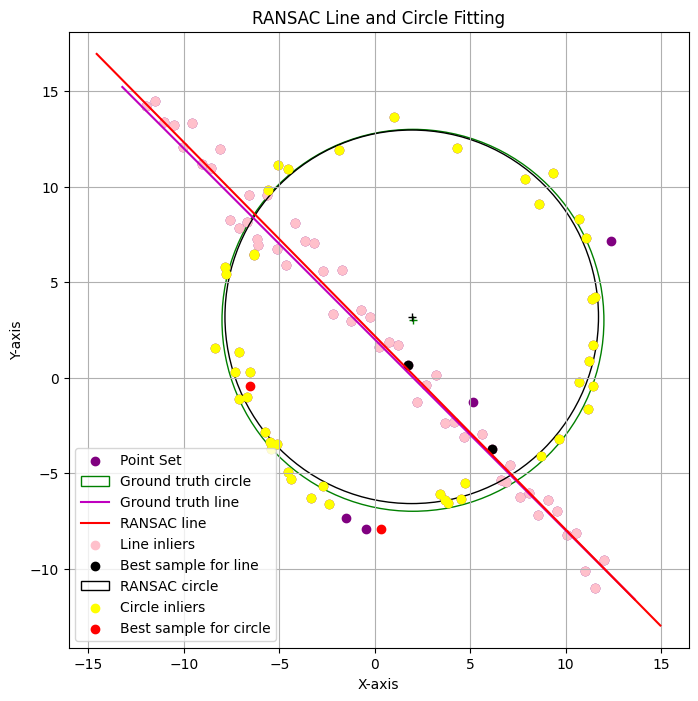

In [63]:
# Plotting all points and the best fit line and circle

# Create a plot
ax = plot_all(False)

# Set x limits for the plot
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
A, B, D = best_fitted_line  # Line parameters
indices = line_inliers  # Inlier indices for the line

# Calculate y values for the line
y_ = (D - A * x_) / B
plt.plot(x_, y_, color='r', label='RANSAC line')  # Plot RANSAC line
ax.scatter(X[indices, 0], X[indices, 1], color='pink', label='Line inliers')  # Plot line inliers
ax.scatter(X[best_line_sample_points, 0], X[best_line_sample_points, 1], color='black', label='Best sample for line')  # Best line sample points

# Check if best_fitted_circle is valid before plotting
if best_fitted_circle is not None:
    x0, y0, r0 = best_fitted_circle  # Circle parameters
    circle_gt = plt.Circle((x0, y0), r0, color='black', fill=False, label='RANSAC circle')  # Create circle patch
    ax.add_patch(circle_gt)  # Add circle to plot
    ax.plot(x0, y0, '+', color='black')  # Mark the center of the circle

    # Plot circle inliers and best circle sample points
    ax.scatter(X_rem[circ_inliers, 0], X_rem[circ_inliers, 1], color='yellow', label='Circle inliers')  # Circle inliers
    ax.scatter(X_rem[best_circ_sample_points, 0], X_rem[best_circ_sample_points, 1], color='red', label='Best sample for circle')  # Best circle sample points

# Add legend to the plot
plt.legend()
plt.title('RANSAC Line and Circle Fitting')  # Title for better clarity
plt.xlabel('X-axis')  # Label for x-axis
plt.ylabel('Y-axis')  # Label for y-axis
plt.grid(True)  # Optional: Add grid for better readability
plt.axis('equal')  # Optional: Equal scaling for x and y axes
plt.show()  # Show the plot


## Question 03

Background Image Shape: (768, 1024, 3), Type: uint8
Flag Image Shape: (960, 1920, 3), Type: uint8


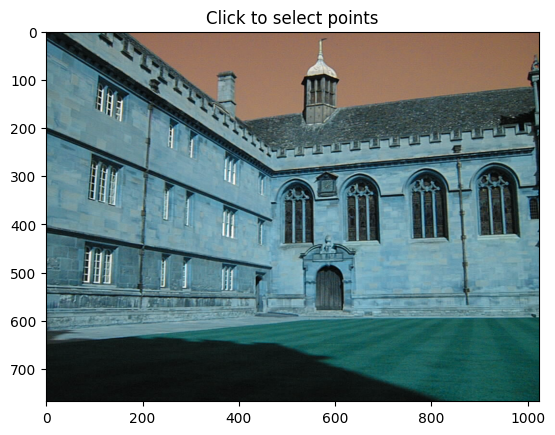

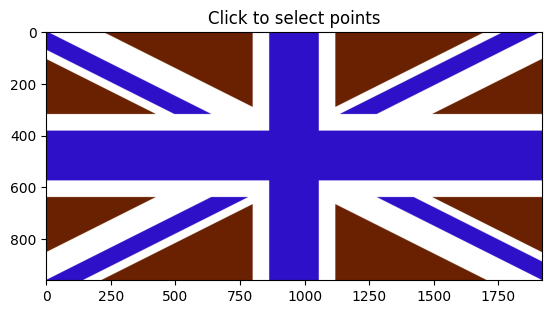

Error: Not enough points collected. You need at least 4 points for each image.


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:390: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'cv::findHomography'


: 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Number of points to select for homography
NUM_POINTS = 4

# Initialize arrays to hold points
background_points = np.empty((NUM_POINTS, 2), dtype=np.float32)
flag_points = np.empty((NUM_POINTS, 2), dtype=np.float32)

# Load images
background_image = cv.imread('005.jpg', cv.IMREAD_COLOR)
flag_image = cv.imread('flag.png', cv.IMREAD_COLOR)

# Check if images are loaded properly
if background_image is None or flag_image is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Print the shapes and types of the images for debugging
print(f"Background Image Shape: {background_image.shape}, Type: {background_image.dtype}")
print(f"Flag Image Shape: {flag_image.shape}, Type: {flag_image.dtype}")

# Function to collect points from the image using Matplotlib
def collect_points(image, num_points):
    points_collected = []

    def onclick(event):
        if len(points_collected) < num_points:
            points_collected.append((event.xdata, event.ydata))
            plt.plot(event.xdata, event.ydata, 'ro')  # Draw point
            plt.draw()

    # Display the image and collect points
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Click to select points")
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

    return np.array(points_collected, dtype=np.float32)

# Collect points for both images
background_points = collect_points(background_image, NUM_POINTS)
flag_points = collect_points(flag_image, NUM_POINTS)

# Check if enough points were collected
if len(background_points) < NUM_POINTS or len(flag_points) < NUM_POINTS:
    print("Error: Not enough points collected. You need at least 4 points for each image.")
    exit()

# Reshape points to the required format for findHomography
background_points = background_points.reshape(-1, 1, 2)
flag_points = flag_points.reshape(-1, 1, 2)

# Calculate the homography matrix
homography_matrix, _ = cv.findHomography(background_points, flag_points)

# Warp the flag image to the background image's perspective
warped_flag = cv.warpPerspective(flag_image, homography_matrix, (background_image.shape[1], background_image.shape[0]))

# Blend the two images together
blended_image = cv.addWeighted(background_image, 0.4, warped_flag, 0.6, 0)

# Display the results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
ax[0].set_title("Background Image")
ax[1].imshow(cv.cvtColor(flag_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Blended Image")
plt.show()
